In [1]:
import pandas as pd
from plot_demo import base_data, top_10_causeofdeath, gender_all_data,gender_related, age_related_heatmap,both_data, age_related
from plot_CA import cal_gender, read_california, cal_gender_compare, cal_youth, cal_age
from plot_cancer import cancer_study, cancer_age
from plot_map_income import get_death_rate_for_states, get_income_data sorted_bar_plot_with_mean, state_heat_map, scatter_with_best_fit

In [2]:
filename = 'state_population_ages_wo_us.csv'
filename_all = 'state_population_ages_all_wo_us.csv'

## 2017 Top 10 Cause of death is the US

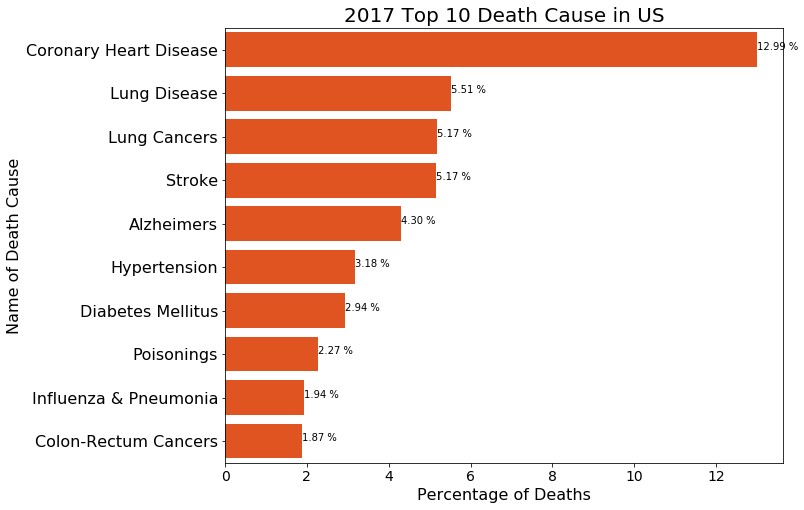

In [3]:
df = base_data(filename)
top_10_causeofdeath(df)

## Death rate of each state in the US

In [4]:
data_file = "state_population_ages_all_wo_us.csv"
income_file = "h08.csv"

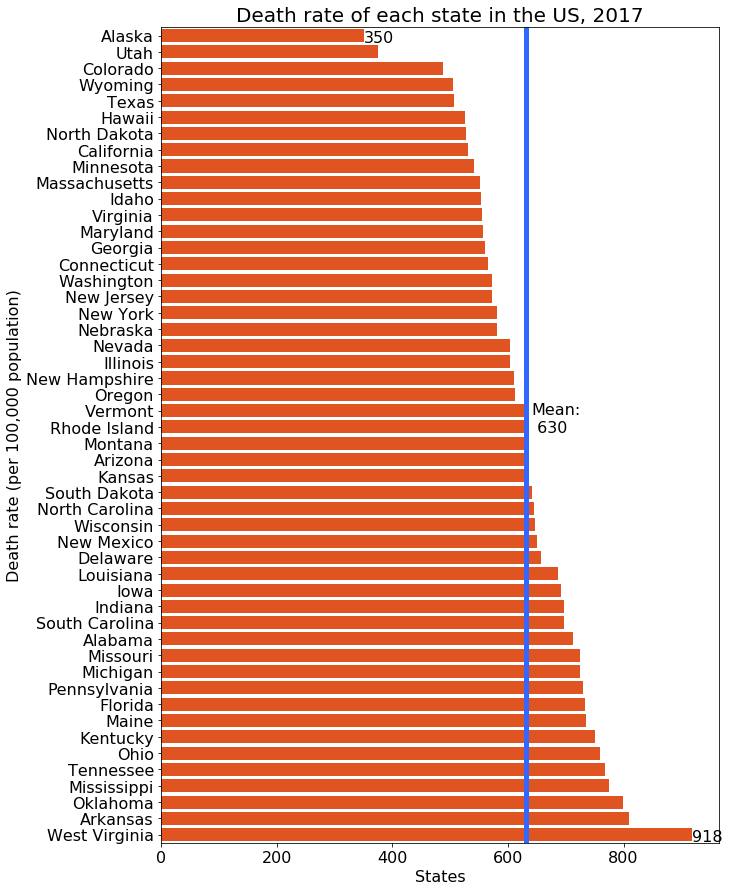

In [5]:
# load data
df = get_death_rate_for_states(data_file)
df = df.reset_index()
# calculate 100k notation of death rate
df["drate100k"] = (df['drate'].astype(float)) * 1e5

# setup plot
x = "drate100k"
xlabel = 'States'
y = "state"
ylabel = 'Death rate (per 100,000 population)'
title = 'Death rate of each state in the US, 2017'

# plot
sorted_bar_plot_with_mean(df, x, y, title, xlabel, ylabel)


## Heatmap for death rate

In [6]:
# load data
df = get_death_rate_for_states(data_file)

# calculate 100k notation of death rate
df["drate100k"] = ((df["drate"].astype(float)) * 1e5).round(2)

# setup plot
z = "drate100k"
df['text'] = df.index + '<br>' + 'death rate: ' + df['drate'].round(5).astype(str)
text = "text"
zlabel = "Death rate <br>(per 100,000 <br>population)"
title = "Death rate of each state in the US, 2017"

# plot
state_heat_map(df, z, zlabel, title, text)

## Heatmap for income

In [7]:
# load data
income = get_income_data(income_file)
df = get_death_rate_for_states(data_file)

# join two data by state index
df = df.join(income.set_index("state"))

# setup plot
z = "Median HouseHold Income"
df['text'] = df.index + '<br>' + 'Median household income: ' + \
             df['Median HouseHold Income'].astype(int).astype(str) + " USD"
text = "text"
zlabel = "Median <br>Household <br>Income <br>(USD)"
title = "Median household income of each state in the US, 2017"

# plot
state_heat_map(df, z, zlabel, title, text)

## Correlation between household income and death rate

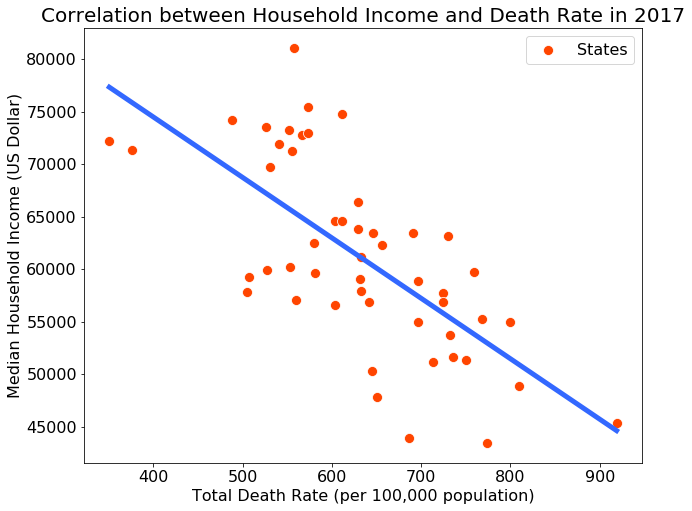

In [8]:
# load data
income = get_income_data(income_file)
df = get_death_rate_for_states(data_file)

# join two data by state index
df = df.join(income.set_index("state"))

# calculate 100k notation of death rate
df["drate100k"] = (df['drate'].astype(float)) * 1e5

# setup plot
x = "drate100k"
xlabel = "Total Death Rate (per 100,000 population)"
y = "Median HouseHold Income"
ylabel = "Median Household Income (US Dollar)"
title = "Correlation between Household Income and Death Rate in 2017"
datalabel = "States"

# plot
scatter_with_best_fit(df, x, y, title, xlabel, ylabel, datalabel)

## Causes of death distribution using heatmap in the US

In [9]:
data = both_data(filename)
age_related_heatmap(data)

[1, 2, 4, 10, 21, 47, 102, 220, 476, 1031]


## Age related/unrelated causes of death

['Drownings', 'Road Traffic Accidents', 'Suicide']


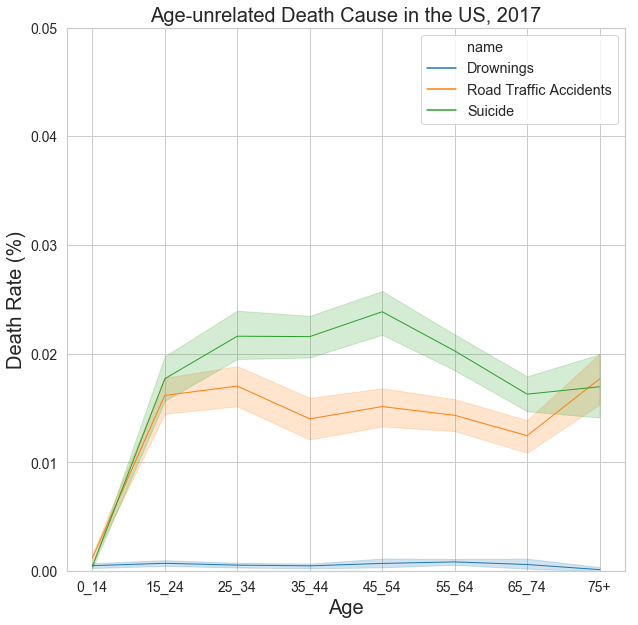

In [10]:
data = both_data(filename)
age_related(data,'Age-unrelated')

['Birth Trauma', 'Low Birth Weight']


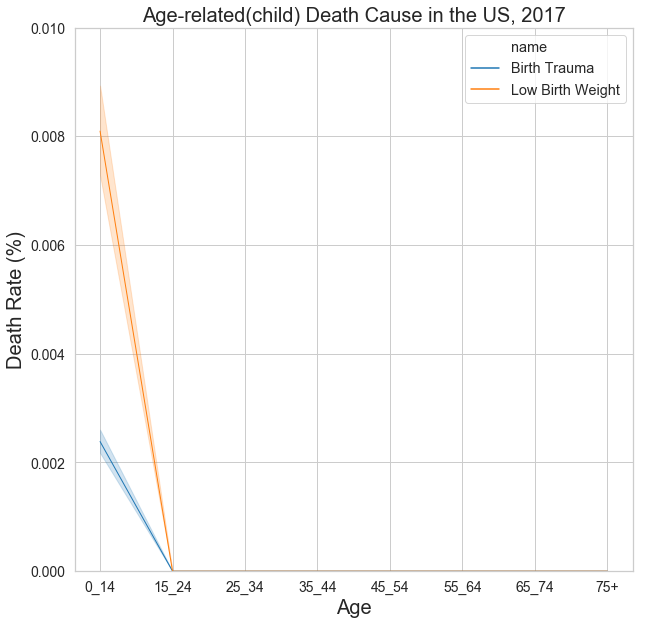

In [11]:
data = both_data(filename)
age_related(data,'Age-related(child)')

['Drug Use', 'HIV/AIDS', 'Homicide', 'Hepatitis B', 'Hepatitis C', 'Poisonings']


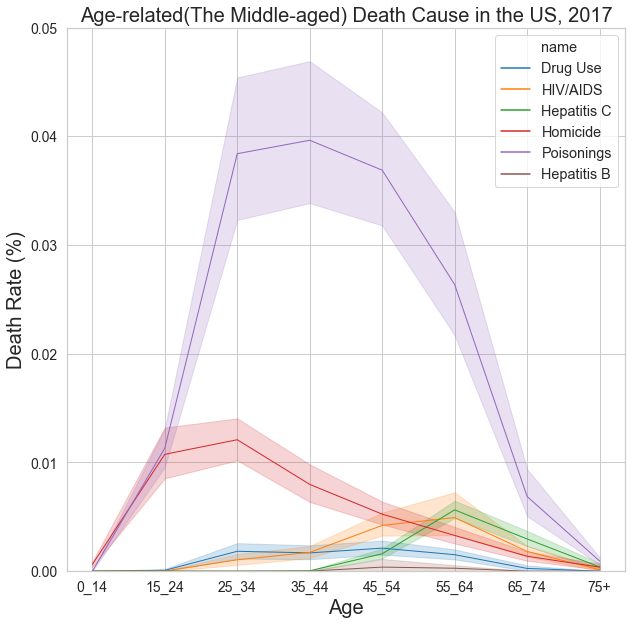

In [12]:
age_related(data,'Age-related(The Middle-aged)')

['Coronary Heart Disease', 'Diabetes Mellitus', 'Endocrine Disorders', 'Hypertension', 'Lung Cancer', 'Pancreas Cancer', 'Prostatic Hypertrophy', 'Schizophrenia', 'Stomach Cancer', 'Stroke']


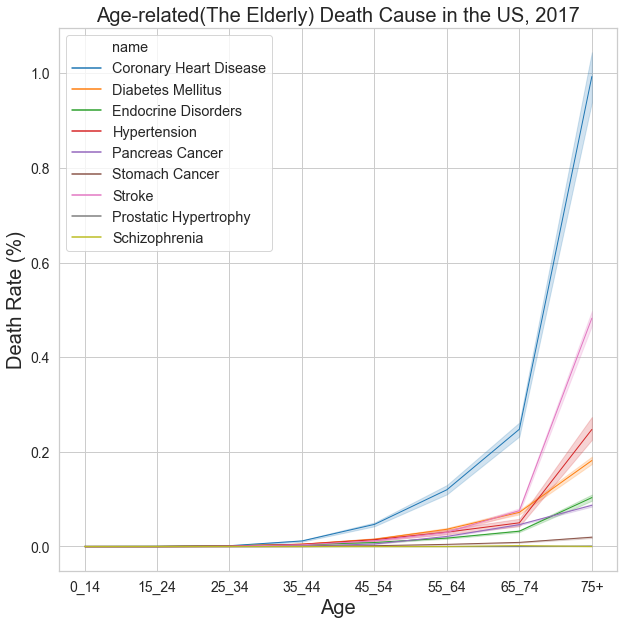

In [13]:
age_related(data,'Age-related(The Elderly)')

## Gender-related causes of death

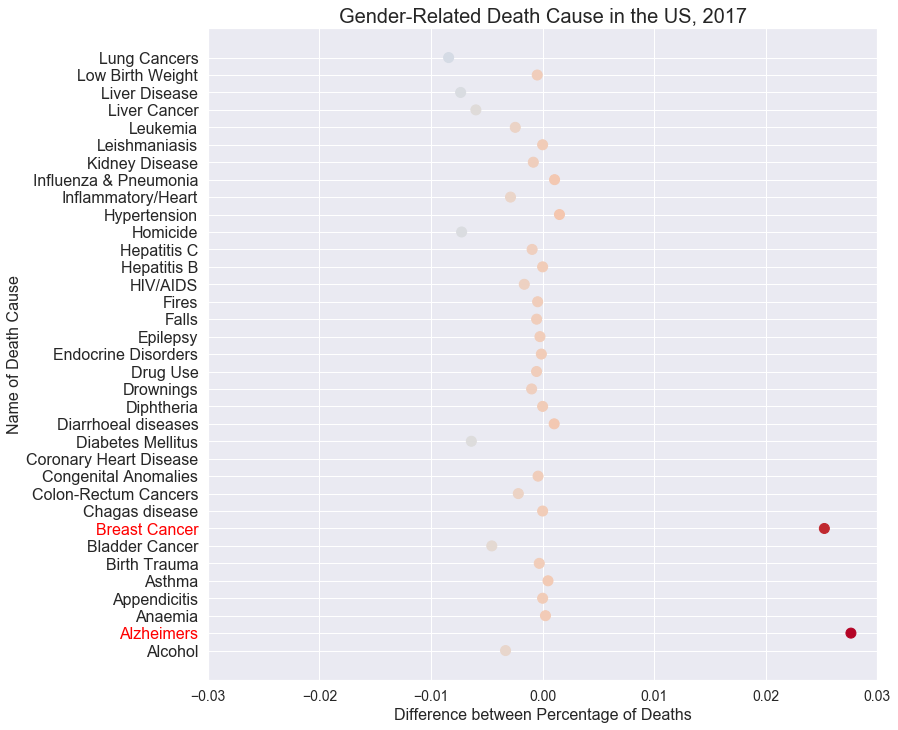

In [14]:
data = gender_all_data(filename_all,'male')
target_m = data.groupby('name')['p'].sum().to_frame()
target_m['d'] = data.groupby('name')['d'].sum().to_frame()
target_m['male_rate'] = target_m['d']/target_m['p'] *100
target_m = target_m.reset_index(level=['name'])
target_m = target_m.drop(['p','d'],axis=1)

data = gender_all_data(filename_all,'female')
target_fm = data.groupby('name')['p'].sum().to_frame()
target_fm['d'] = data.groupby('name')['d'].sum().to_frame()
target_fm['female_rate'] = target_fm['d']/target_fm['p'] *100
target_fm = target_fm.reset_index(level=['name'])
target_fm = target_fm.drop(['p','d'],axis=1)

gender_related(target_m,target_fm,'first')

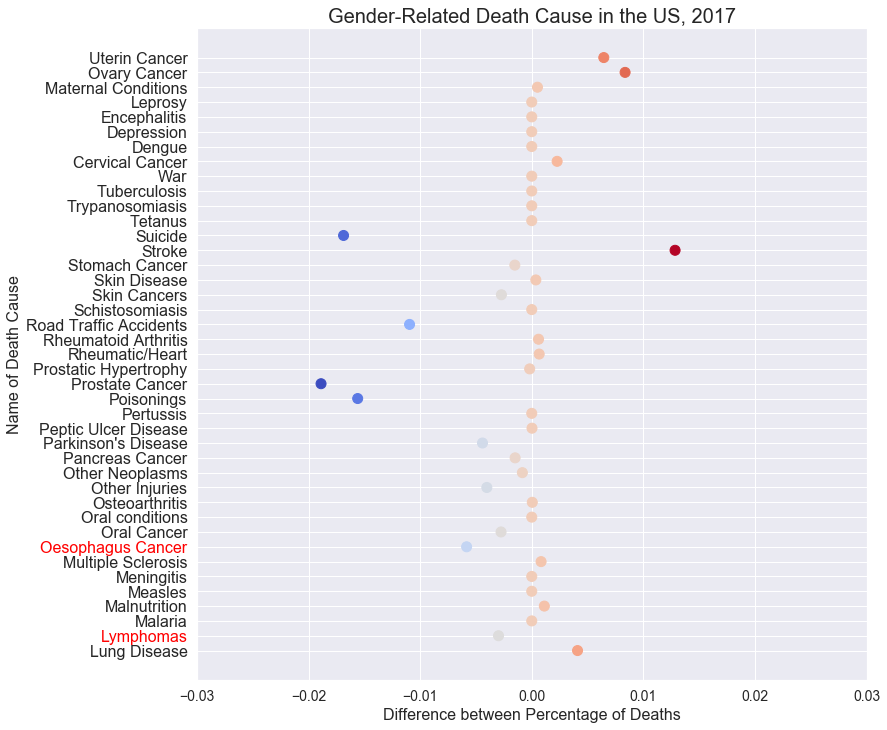

In [15]:
gender_related(target_m,target_fm,'second')

## Case of study: Cancer

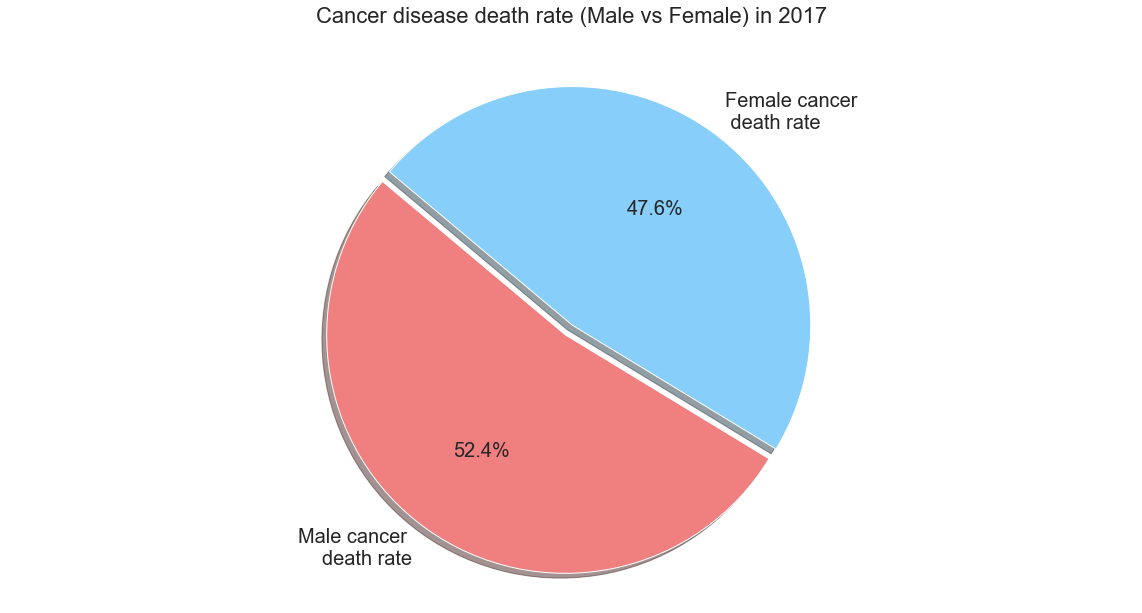

In [16]:
cancer_study(filename_all)

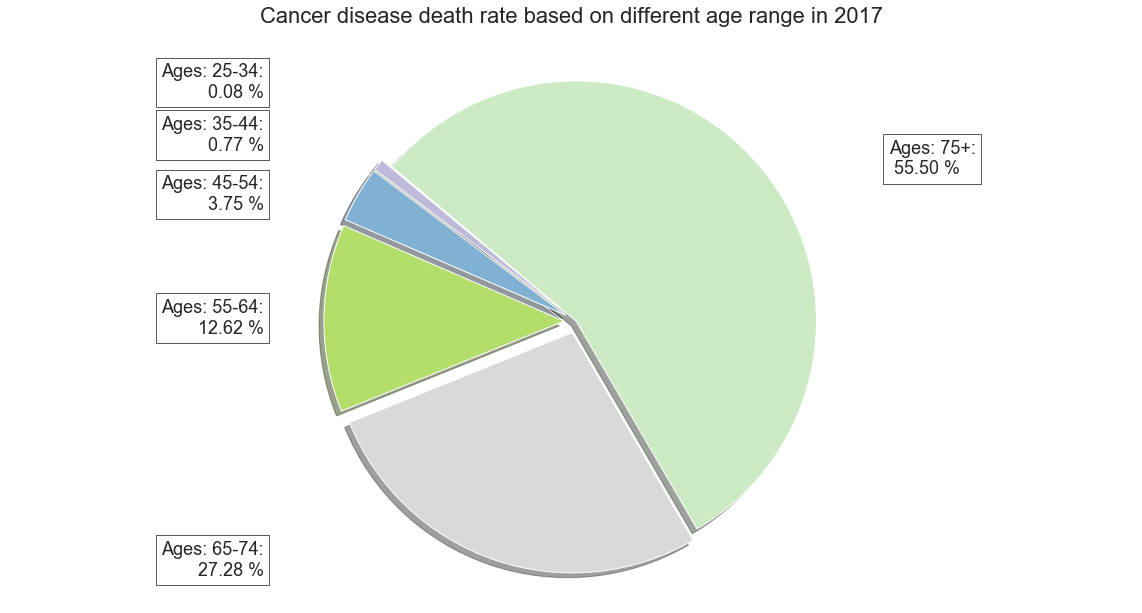

In [17]:
cancer_age(filename)

## Case study: Calfiornia

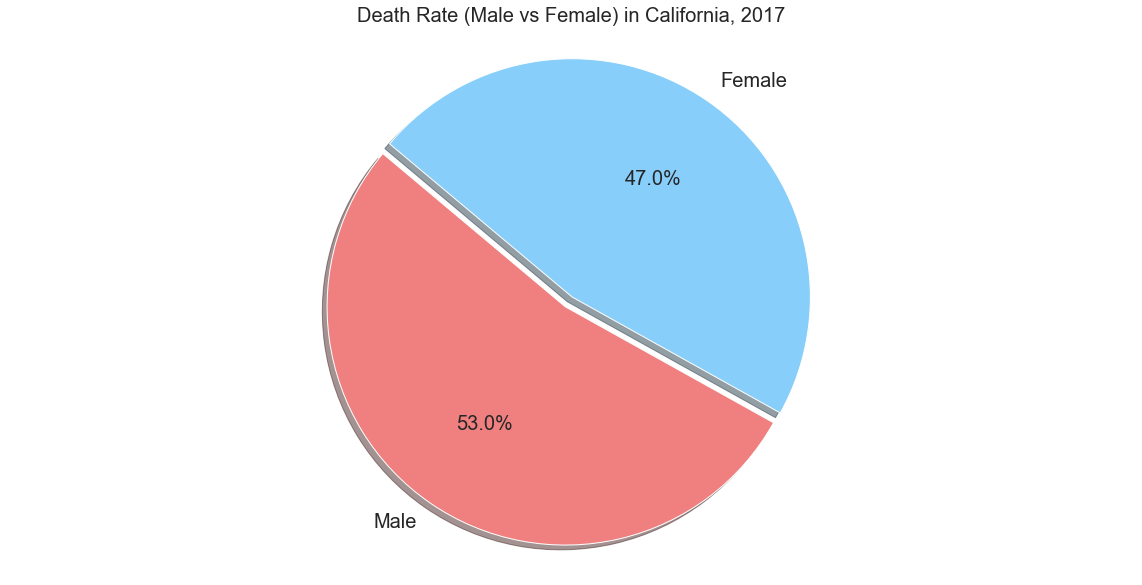

In [18]:
data = read_california(filename_all)
cal_gender(data)

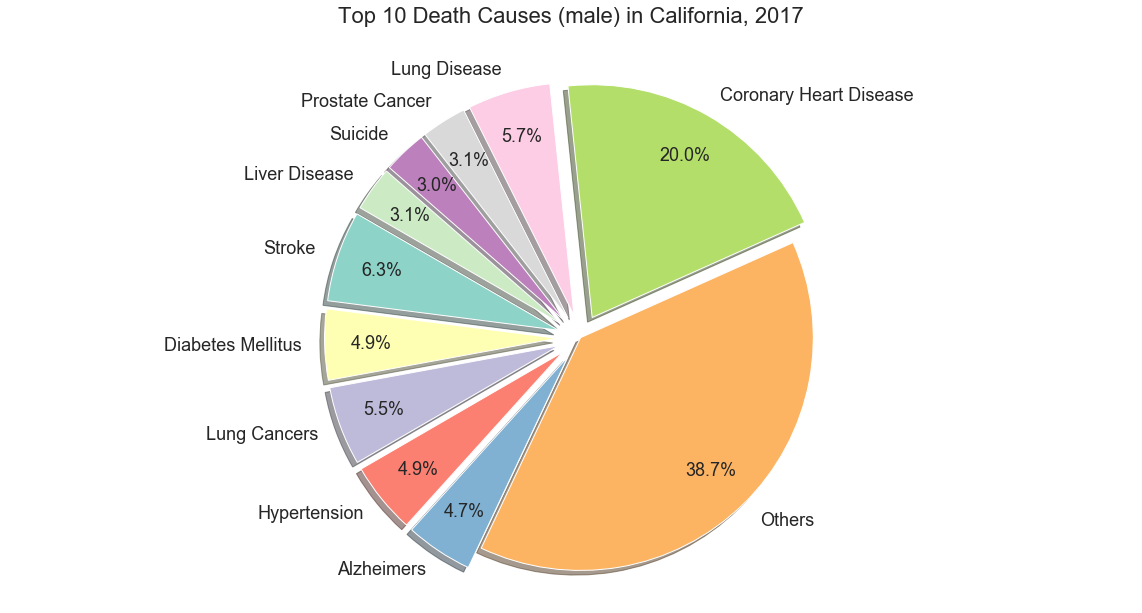

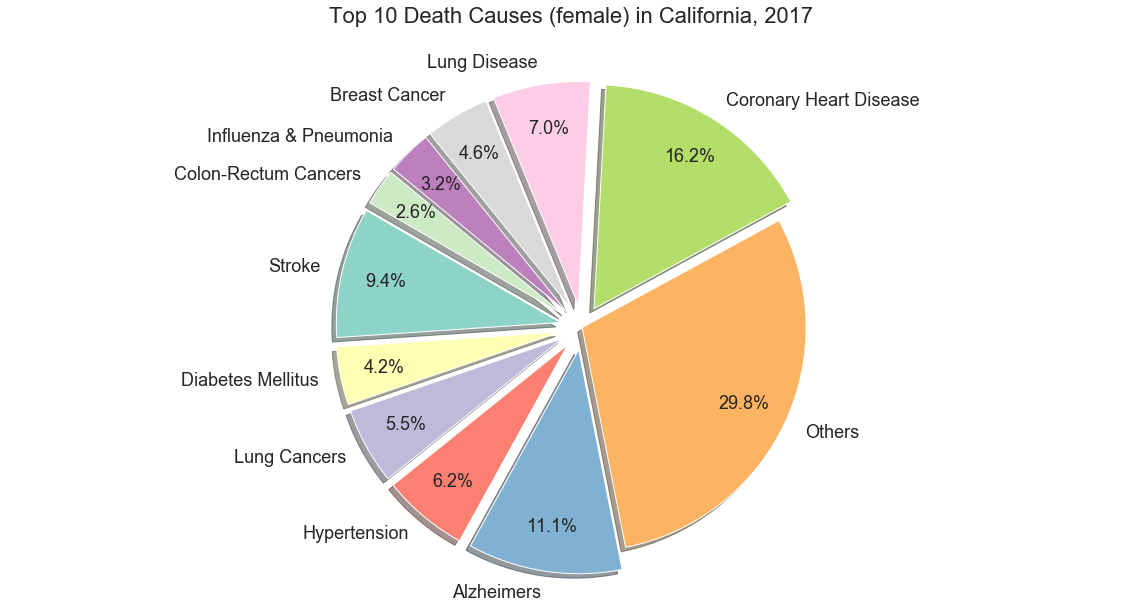

In [19]:
data = read_california(filename_all)
cal_gender_compare(data)

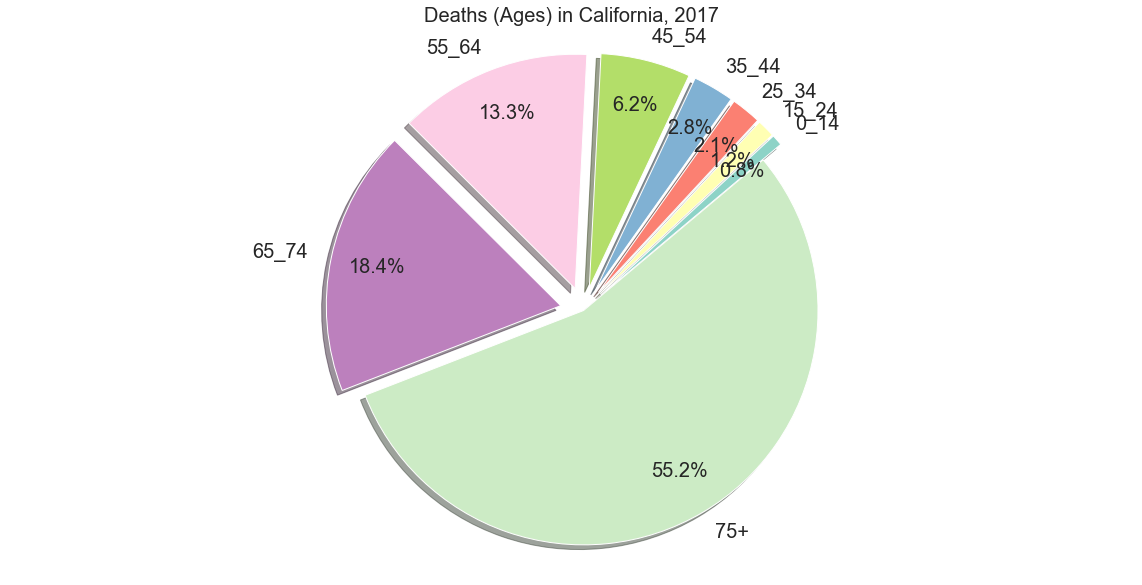

In [20]:
cal_age(filename_all)

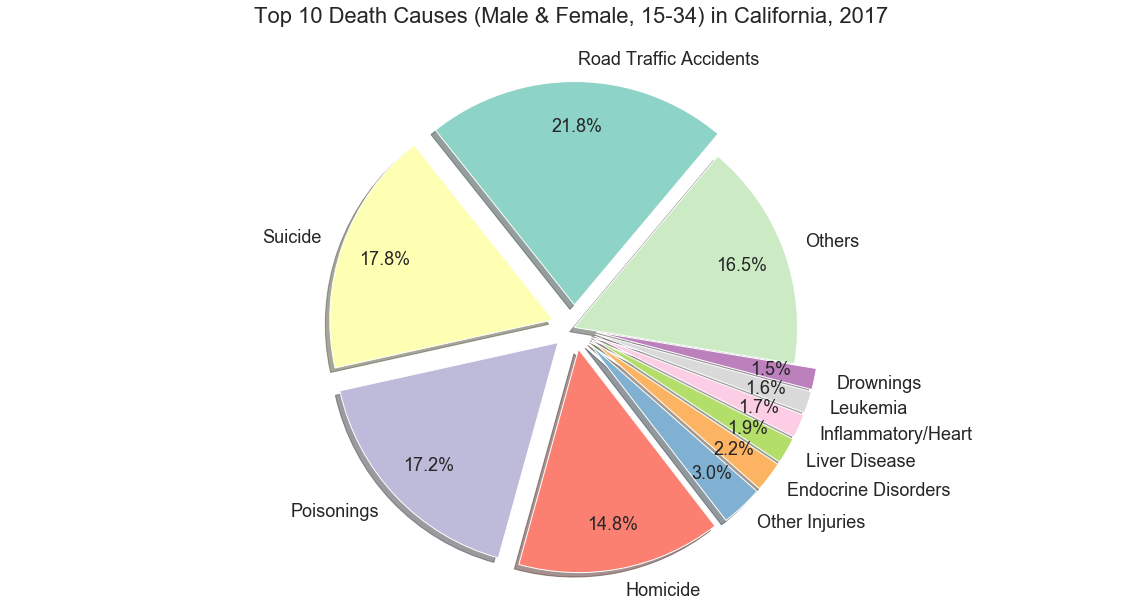

In [21]:
cal_youth(filename_all)